# System adequacy case study for CVAE load generation, PSCC 2022

Author: Ensieh Sharifnia, Delft University of Technology, 2021-2022.
Released under the MIT license.

This notebook generates results that are similar\* to those the in the Multi-Area Resource Adequacy Assessment Case Study of the paper *Generating Multivariate Load States Using a Conditional Variational Autoencoder* by Chenguang Wang, Ensieh Sharifnia, Zhi Gao, Simon H. Tindemans, Peter Palensky, to be presented at the PSCC 2022 conference. 

A preprint of the paper is available here: https://arxiv.org/abs/2110.11435. If you use (portions of) this code, please reference the published paper.

\*: Similarity only due to dependence on execution time

In [1]:
import numpy as np
import MAFApplication

In [2]:
maf_obj = MAFApplication.MAFApplication()

## Table II

Calculated risks of selected countries (with and without interconnection

In [3]:
# initialized parameters
number_iterations = 1_000_000
load_models =[ 'historical_load', 'CVAE', 'VAE','Gaussian_Copula', 'GANs']
#AT, NL, UK
country_list = [1, 24, 34]
table2_LOLE = [['AT          ', 'NL          ', 'UK          '],
               ['AT(island)  ', 'NL(island)  ', 'UK(island)  ']]
table2_EENS = [['', '', ''],
               ['', '', '']]
LOLE_models = np.zeros(shape=(len(load_models), maf_obj.node.shape[0]))
LOLE_std_error = np.zeros_like(LOLE_models)

In [4]:
## Table 2
## Calculated risks of selected countries (with and without interconnection) using historical data and all generative models.
for i , load_model in enumerate( load_models):

    (MC_lol_no_connection, MC_ens_no_connection, MC_lol,MC_ens, MC_time) = maf_obj.MCS( num_itr=number_iterations, load_model=load_model, joblib=True) 
    LOLE_models[i, :], LOLE_std_error[i, :] = maf_obj.expectation_err(risk = 'LOLE', risk_measures = MC_lol, percountry=True)
    EENS, EENS_std_error = maf_obj.expectation_err(risk = 'EENS', risk_measures = MC_ens, percountry=True)
    LOLE_is, LOLE_is_std_error = maf_obj.expectation_err(risk = 'LOLE', risk_measures = MC_lol_no_connection, percountry=True)
    EENS_is, EENS_is_std_error = maf_obj.expectation_err(risk = 'EENS', risk_measures = MC_ens_no_connection, percountry=True)
    for j, country in enumerate(country_list):
        table2_LOLE[0][j] += "{:<9}".format(maf_obj.scientific_notation(risk_value=LOLE_models[i, country], std_error=LOLE_std_error[i,country]))
        table2_LOLE[1][j] += "{:<9}".format(maf_obj.scientific_notation(risk_value=LOLE_is[country], std_error=LOLE_is_std_error[country]))
        table2_EENS[0][j] += "{:<13}".format(maf_obj.scientific_notation(risk_value=EENS[country], std_error=EENS_std_error[country]))     
        table2_EENS[1][j] += "{:<13}".format(maf_obj.scientific_notation(risk_value=EENS_is[country], std_error=EENS_is_std_error[country]))
        

In [5]:
## print Table 2
print("__________________________________________________________________________________________________________________________")
#       "UK(island)  1139(296) 788(252) 438(192) 788(252) 2365(391) 5.0(17)x10^6 3.6(16)x10^6 1.7(9)x10^6 3.1(11)x10^6 1.15(25)x10^7"
print("Country                       LOLE                                                 EENS")
print("         historical   CVAE    VAE   Gaussian     GANs historical      CVAE         VAE      Gaussian      GANs ")
print("            data                     copula             data                                copula")
print("__________________________________________________________________________________________________________________________")
for i in range(2):
    for j in range(len(country_list)):
        print(table2_LOLE[i][j] + table2_EENS[i][j])
    if i==0:
        print("__________________________________________________________________________________________________________________________")

__________________________________________________________________________________________________________________________
Country                       LOLE                                                 EENS
         historical   CVAE    VAE   Gaussian     GANs historical      CVAE         VAE      Gaussian      GANs 
            data                     copula             data                                copula
__________________________________________________________________________________________________________________________
AT          0.026(15)0.009(9) 0.18(4)  0.31(5)  0.07(25) 2.0(15)      0.21(21)     36(10)       50(11)       16(6)        
NL          0.8(8)   0.25(5)  1.0(9)   4.33(20) 3.54(18) 129(19)      38(9)        363(47)      1092(65)     1720(125)    
UK          38.9(6)  50.3(7)  54.8(7)  51.4(7)  229.0(14)5.32(11)x10^48.90(16)x10^41.166(20)x10^58.21(14)x10^45.14(4)x10^5 
_____________________________________________________________________________________

## create Figure 5: European Map

Comparison of LOLE estimates using historical load data and  generative load. The area of each sector of the disc represents the LOLE of the corresponding model (20h/y shown for scale in legend)

In [6]:
# for plotting map
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Wedge, Rectangle
import matplotlib.patches as patches

In [55]:

## lat and long of the European countries
lons = np.array([19.53,
                 14.08, 17.82, 5, 25.2, 8.12,
                 33.21, 15.33, 10.29, 8.88, 25.82,
                 -3.62, 23.71, 2.88, 21.72, 16.57,
                 19.36, -8.01, 12.14, 23.88, 5.97,
                 24.83, 19.29, 20.7, 5.51, 9.47, 
                 19.31, -8.06, 24.94, 19.82, 14.6,
                 14.94, 19.51, 29.95, -2.85])
lats = np.array([41.14,
                 47.61, 44.18, 51, 42.75, 46.79,
                 35.05, 49.78, 51.13, 56.06, 58.64,
                 40.35, 61.0, 47.46, 39.07, 45.72, 
                 47.2, 52.68, 42.75, 55.28, 49.77, 
                 56.81, 42.79, 41.61, 52.3, 60.16, 
                 52.15, 39.63, 45.86, 44.23, 59.81,
                 46.13, 48.73, 39.13, 55.91])

##colour setting
border_color = 'white'
color_palet = ['#aa3376','#ccbc44','#ee6676', '#228833','#66ccee' ]
sea_color = '#ECEFF1'
soil_color = '#CFD8DC'
font_color = 'black'


## Corrdinates of the European continent
x1 = -12.
x2 = 35.
y1 = 33.
y2 = 64.

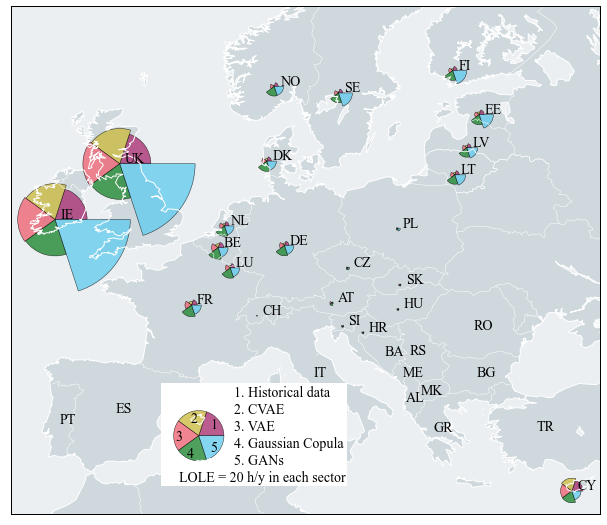

In [56]:
fig = plt.figure(figsize=(11.7,8.3))
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = fig.add_subplot(111, aspect='equal')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif'] 

## plot map
m = Basemap(resolution='l',projection='mill', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2, ax=ax)
m.drawcoastlines(color=border_color)
m.drawcountries(color=border_color)
m.drawstates(color=border_color)
m.fillcontinents(color=soil_color, lake_color=sea_color)
m.drawmapboundary(fill_color=sea_color)

## plot LOLE
alpha = 0.8
sector = int(360.0/len(load_models))
scale = 35_000
for ind, name in enumerate(maf_obj.node['country']):
    theta=0
    x, y = m(lons[ind], lats[ind])
    plt.text(x, y, name, fontsize=14, ha='left',va='center',color=font_color)
    for i in range(len(load_models)):
        if (LOLE_models[i, ind] >0):
            r = np.sqrt(LOLE_models[i, ind]*(360/sector)/np.pi)
            ax.add_patch(
            patches.Wedge(
                (x-50_000, y-50_000),         # (x,y)
                r*scale,            # radius
                theta,             # theta1 (in degrees)
                theta+sector,            # theta2
                facecolor=color_palet[i], alpha=alpha , linewidth=0.5, edgecolor="black"
            ))
        theta+= sector

## add legend
lon = 0
lat = 35
x, y = m(lon, lat)
ax.add_patch(patches.Rectangle((x,y), width=47*scale, height=26*scale, angle=0.0, facecolor='white' ))
theta = 0

x_center, y_center = m(lon+3, lat+3.5)
lons=[x_center+3*scale, x_center-2*scale, x_center-6*scale, x_center-3*scale,   x_center+3*scale]
lats=[y_center+3*scale,y_center+4.5*scale, y_center, y_center-4.5*scale,  y_center-3*scale]
text_lons = x_center+9*scale
text_lats = y_center+11*scale
for ind, model in enumerate(np.array(['Historical data', 'CVAE','VAE','Gaussian Copula', 'GANs'])): 
    x, y = m(lon, lat)
    ax.add_patch(patches.Wedge((x_center, y_center),         
                                6.37*scale,            
                                theta,             
                                theta+sector,           
                                facecolor=color_palet[ind], alpha=alpha, linewidth=0.5, edgecolor="black"))

    plt.text(lons[ind], lats[ind],ind+1,fontsize=14, ha='left',va='center',color=font_color)
    plt.text(text_lons, text_lats,str(ind+1)+". "+model,fontsize=14, ha='left',va='center',color=font_color)
    
    text_lats -=150_000
    theta += sector
plt.text(text_lons-14*scale, text_lats,"LOLE = 20 h/y in each sector",fontsize=14, ha='left',va='center',color=font_color)
plt.show()